In [6]:
import pandas as pd

data = pd.read_csv("IMDb Movies India.csv", encoding="latin-1")
data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
data.columns



Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [9]:
import pandas as pd

# Rating missing rows remove (target missing nahi hona chahiye)
data = data.dropna(subset=['Rating'])

# Year clean
data['Year'] = data['Year'].str.extract('(\d+)')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Duration clean (remove "min")
data['Duration'] = data['Duration'].str.replace('min','')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Votes clean (remove commas)
data['Votes'] = data['Votes'].str.replace(',','')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# fill numeric NaN
data['Year'].fillna(data['Year'].median(), inplace=True)
data['Duration'].fillna(data['Duration'].median(), inplace=True)
data['Votes'].fillna(data['Votes'].median(), inplace=True)

print("Cleaning done")



Cleaning done


<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-216875533.py:7: SyntaxWarning: invalid escape sequence '\d'
  data['Year'] = data['Year'].str.extract('(\d+)')
/tmp/ipython-input-216875533.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Year'].fillna(data['Year'].median(), inplace=True)
/tmp/ipython-input-216875533.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace metho

In [10]:
# Year clean
data['Year'] = data['Year'].str.extract(r'(\d+)')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Duration clean
data['Duration'] = data['Duration'].str.replace('min','')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

# Votes clean
data['Votes'] = data['Votes'].str.replace(',','')
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')

# fill NaN without inplace warning
data['Year'] = data['Year'].fillna(data['Year'].median())
data['Duration'] = data['Duration'].fillna(data['Duration'].median())
data['Votes'] = data['Votes'].fillna(data['Votes'].median())

print("Clean OK ✅")


AttributeError: Can only use .str accessor with string values!

In [11]:
data['Year'].dtype


dtype('int64')

In [12]:
data['Year'] = data['Year'].fillna(data['Year'].median())
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Duration'] = data['Duration'].fillna(data['Duration'].median())

data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce')
data['Votes'] = data['Votes'].fillna(data['Votes'].median())

print("Numeric columns ready ✅")

Numeric columns ready ✅


In [13]:
cat_cols = ['Genre','Director','Actor 1','Actor 2','Actor 3']

for col in cat_cols:
    data[col] = data[col].astype('category').cat.codes

print("Encoding done ✅")


Encoding done ✅


In [14]:
X = data[['Year','Duration','Votes','Genre','Director','Actor 1','Actor 2','Actor 3']]
y = data['Rating']


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained ✅")


Model trained ✅


In [16]:
from sklearn.metrics import mean_absolute_error

pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred))


MAE: 1.032802225586151


In [17]:
print("Predicted sample ratings:")
print(pred[:10])



Predicted sample ratings:
[6.07214117 5.31232298 5.25288644 5.77663675 5.73466264 5.50330582
 6.06228079 5.80065254 6.28941481 5.89994189]


In [18]:
from sklearn.metrics import r2_score

print("R2 Score:", r2_score(y_test, pred))


R2 Score: 0.09339769663289677


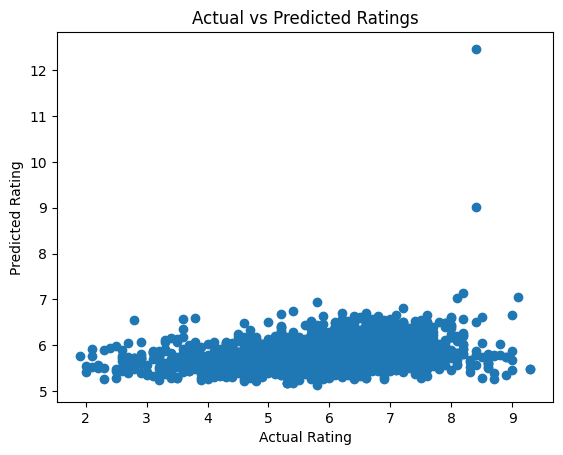

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Ratings")
plt.show()

